<a href="https://colab.research.google.com/github/SivalayaG/BioInf/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
from scipy.stats import halfnorm
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.utils._testing import ignore_warnings
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Obtain and clean our final train data

train_data = pd.read_csv('/content/drive/MyDrive/trainset.csv')
train_data

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AL732372.1,AC114498.1,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,y
0,0,0,0,0,0,0,21,0,0,0,...,16001,93232,152327,36652,15678,183877,109635,38316,104899,1
1,0,0,0,2,0,0,0,0,0,0,...,23848,171153,247889,82918,25217,414523,208486,104307,153226,1
2,0,0,0,0,0,0,8,0,0,0,...,12618,70918,155271,26228,11405,148457,44292,15828,61443,1
3,0,0,0,5,0,1,5,0,0,0,...,10495,64060,86559,24568,16963,195953,44106,13820,82851,1
4,0,0,0,0,0,0,6,0,0,0,...,12846,81632,193420,39533,12029,191583,70519,29697,101419,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,0,0,0,3,0,0,16,0,0,0,...,21828,166787,267334,58733,38800,690291,92768,22655,220095,1
588,0,0,0,0,0,0,10,0,0,0,...,6758,61607,121844,29198,10497,211094,79926,25064,126121,1
589,0,0,0,7,0,7,53,0,0,1,...,58792,535212,984619,202069,115624,2074258,733766,198114,856510,1
590,0,0,0,1,0,5,85,0,0,0,...,16945,120798,231400,66018,23556,341904,126735,38872,199622,1


In [ ]:
## We have 533 tumor genes data and 59 normal genes data

train_data.y.value_counts()

1    533
0     59
Name: y, dtype: int64

In [ ]:
## Create x and y separately from out train data

x = train_data.drop(['y'], axis = 1, inplace = False).to_numpy()
y = train_data[['y']].to_numpy()

x.shape, y.shape

((592, 33621), (592, 1))

In [ ]:
## We split our data into train and test split by 80/20 ratio

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify=y, test_size=0.20)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((473, 33621), (473, 1), (119, 33621), (119, 1))

In [ ]:
## We verify the stratified sampling in our test data 
## by checking number of tumors vs non-tumors

unique, counts = np.unique(test_y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0  12]
 [  1 107]]


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

def val_acc_class_report_error_analysis(name, model, val_x, val_y, accuracy_only=False):
    pred_y  = model.predict(val_x)
    cm = confusion_matrix(val_y, pred_y)
    print('Model: {}'.format(name))
    
    ### Use the confusion matrix to compute (using NumPy) the accuracy (call the result 'val_acc')

    val_acc = (cm.trace()) / cm.sum()
    
    print('--- Validation accuracy: {: .2f}%\n'.format(val_acc*100))
    
    if accuracy_only:
        return
    
    classes = [str(d) for d in range(0, 10)]
    print('--- Classification Report: ')
    
    ### Print the classification report with 3 digits of precision
    
    print(classification_report(val_y, pred_y, digits=3))
          
    # fig = plt.figure(figsize=(10,8))
    # ax = plt.gca()
    # note: depending on your sklearn version, you may get a warning/error because `plot_confusion_matrix` is deprecated
    # if so, you should use ConfusionMatrixDisplay instead and fix the code so it plots the confusion matrix
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

In [ ]:
## Define our model and hyperparameters' range to tune for getting bext model

param_dist = dict(n_estimators=[x for x in range(50,150)], criterion=['gini', 'entropy', 'log_loss'], min_samples_split=[x for x in range(1,50)], min_samples_leaf=[x for x in range(1,50)], max_features= ['sqrt', 'log2'])
model = RandomForestClassifier(random_state=42)

param_dist

{'n_estimators': [50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'min_samples_split': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46

In [ ]:
## Train our model using RandomizedSearchCV with 10 kfold for cross validation


@ignore_warnings()
def do_randomized_search(model, param_dist):
    # RandomizedSearchCV class of scikit-learn to do a randomized search (use 'model')
    # We compute accuracy as scoring function and return the result of fit() on the training data 
    
    rs_cv = RandomizedSearchCV(model, param_distributions=param_dist, scoring='accuracy', cv = 10, random_state=42)
    return rs_cv.fit(train_x, train_y)

# Print best hyperparameters
rs_res = do_randomized_search(model, param_dist)
rs_res.best_params_

{'n_estimators': 82,
 'min_samples_split': 46,
 'min_samples_leaf': 27,
 'max_features': 'sqrt',
 'criterion': 'gini'}

Model: Random Forest Classifier
--- Validation accuracy:  97.48%

--- Classification Report: 
              precision    recall  f1-score   support

           0      1.000     0.750     0.857        12
           1      0.973     1.000     0.986       107

    accuracy                          0.975       119
   macro avg      0.986     0.875     0.922       119
weighted avg      0.975     0.975     0.973       119



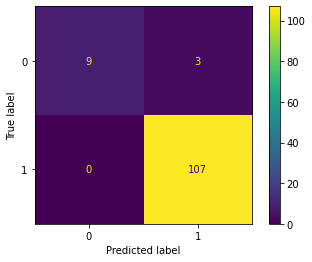

In [ ]:
## Print accuracy and classification report to analyze results

best_model = rs_res.best_estimator_
val_acc_class_report_error_analysis("Random Forest Classifier", best_model, test_x, test_y)

In [ ]:
rs_res.best_score_

0.9746897163120568

In [ ]:
estimator = best_model.estimators_[5]

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = train_data.columns[:-1],
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree2.png', '-Gdpi=600'])

0

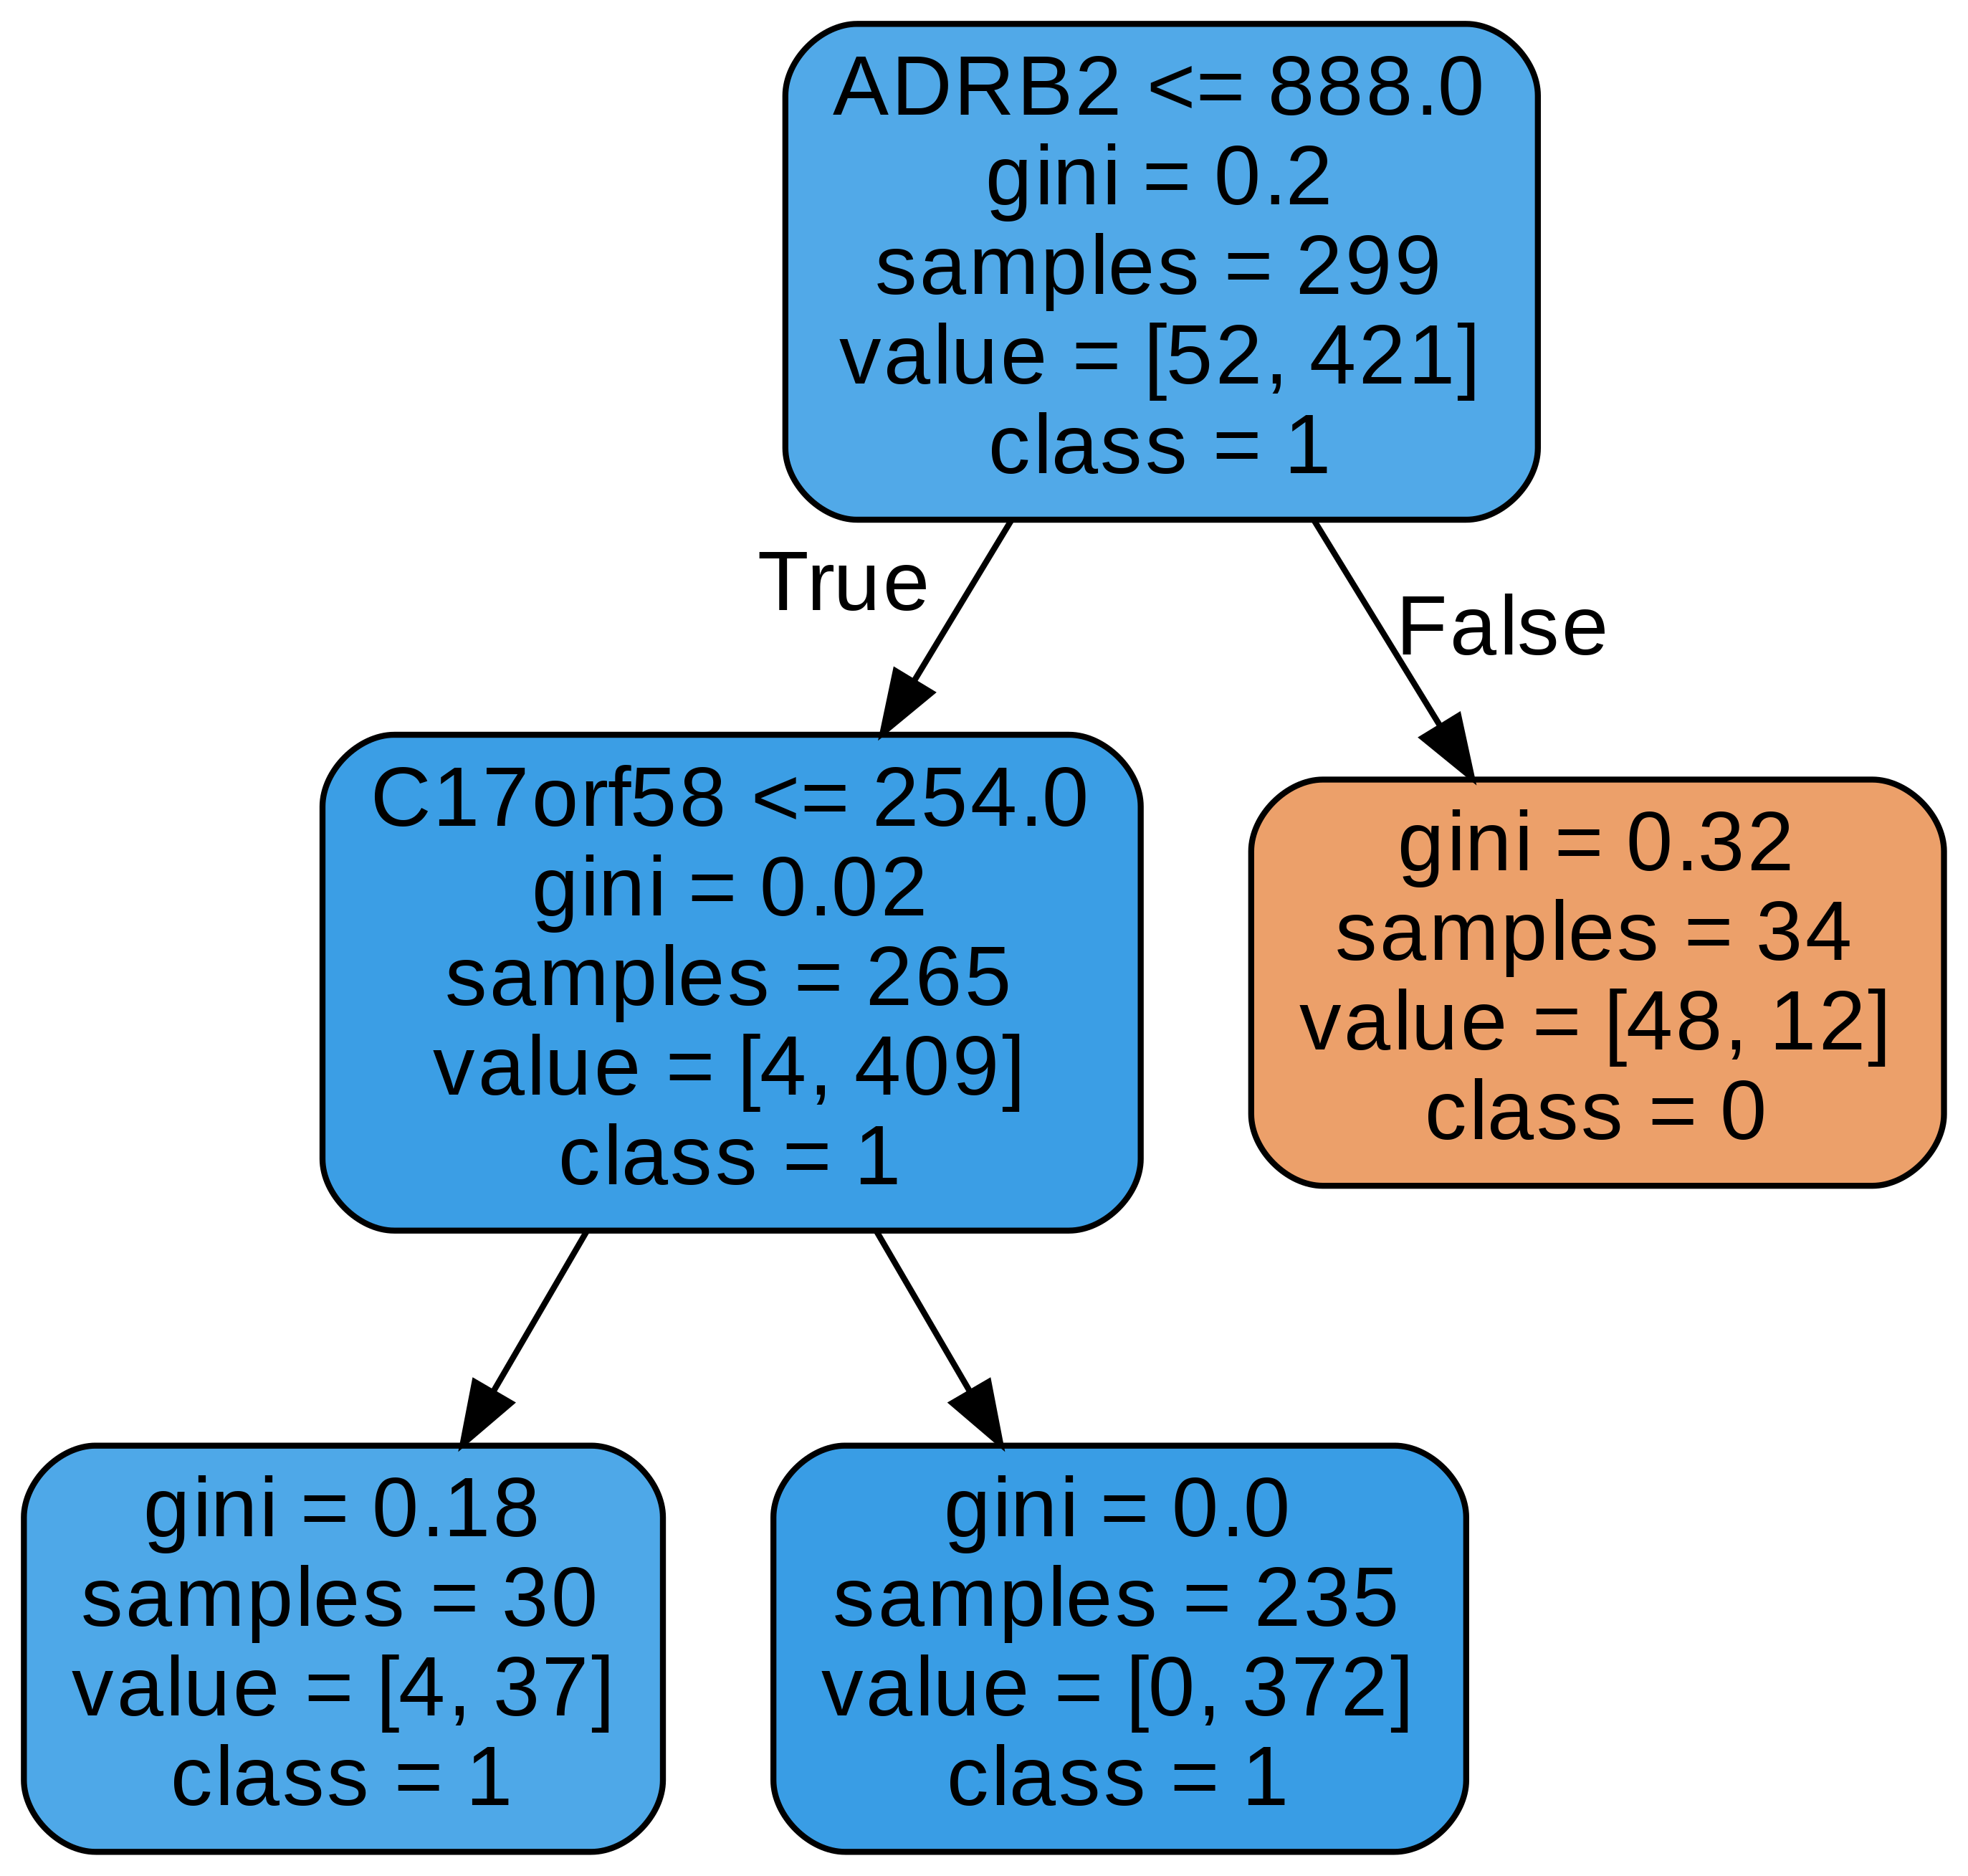

In [ ]:
from IPython.display import Image
Image(filename = '/content/tree2.png')

In [ ]:

arr = train_data.corr()['y']

In [ ]:
arr

MIR1302-2HG    0.026375
FAM138A       -0.028602
OR4F5          0.038940
AL627309.1    -0.013457
AL627309.3          NaN
                 ...   
MT-ND4         0.091243
MT-ND5        -0.068171
MT-ND6        -0.138665
MT-CYB         0.044336
y              1.000000
Name: y, Length: 33621, dtype: float64

In [ ]:
correlation_df = pd.DataFrame(arr)

In [ ]:
correlation_df = correlation_df.dropna()

In [ ]:
correlation_df

,y
MIR1302-2HG,0.026375
FAM138A,-0.028602
OR4F5,0.038940
AL627309.1,-0.013457
AL627309.2,0.120018
...,...
MT-ND4,0.091243
MT-ND5,-0.068171
MT-ND6,-0.138665
MT-CYB,0.044336


In [ ]:
correlation_df = correlation_df.sort_values(['y'], ascending=[False])

In [ ]:
correlation_df

,y
y,1.000000
CNOT11,0.361271
ALDH18A1,0.357590
SFXN1,0.350175
SRPK1,0.349800
...,...
AL606469.1,-0.786444
AC095050.1,-0.793924
LANCL1-AS1,-0.797892
AGER,-0.808216
